# Découvrir Git par la pratique: la gymnastique quotidienne

Lino Galiana  
2025-03-19

Le [chapitre d’introduction](../../content/git/index.qmd) de la partie a évoqué les enjeux, présentés de manière synthétique
dans un [cours dédié fait avec Romain Avouac](https://inseefrlab.github.io/formation-bonnes-pratiques-git-R/slides/complete.html)

Dérouler les *slides* ci-dessous ou [cliquer ici](https://inseefrlab.github.io/formation-bonnes-pratiques-git-R/slides/complete.html#/partie-1-contr%C3%B4le-de-version-avec-git) pour afficher les slides en plein écran.

Ce chapitre va être l’occasion de faire ses premiers pas avec `Git`. Le prochain chapitre sera consacré au travail collaboratif. Ce chapitre propose, pour simplifier l’apprentissage, d’utiliser l’extension `Git` de `VSCode` ou de `JupyterLab`. `VSCode` propose
probablement, à l’heure actuelle, l’extension la plus complète. Certains passages de ce TD nécessitent d’utiliser la ligne de commande.

Il est tout à fait possible de réaliser ce TD entièrement avec la ligne de commande.
Cependant, pour une personne débutante en `Git`, l’utilisation d’une
interface graphique peut constituer un élément important pour
la compréhension et l’adoption de `Git`. Une fois à l’aise avec
`Git`, on peut tout à fait se passer des interfaces graphiques
pour les routines quotidiennes et ne les utiliser que
pour certaines opérations où elles s’avèrent fort pratiques
(notamment la comparaison de deux fichiers avant de devoir fusionner).

Pour comprendre les analogies avec le versionnage artisanal à la main, rappelons nous le principe de celui-ci avec la <a href="#fig-version-control-inferno" class="quarto-xref">Figure 1</a>

<figure id="fig-version-control-inferno">
<img src="https://inseefrlab.github.io/formation-bonnes-pratiques-git-R/slides/img/fichiers_multiples.png" />
<figcaption>Figure 1: Le contrôle de version artisanal</figcaption>
</figure>

<div class="alert alert-danger" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-triangle-exclamation"></i> Important</h3>

Il est vivement recommandé de privilégier `VSCode` pour l’apprentissage de `Git`. Son extension est très bien faite, bien meilleure que celle de `Jupyter`.

`Colab` n’embarque pas, nativement, d’extension `Git`. Des sauvegardes automatiques sont possibles sur `Github` mais ce n’est pas une pratique à encourager. Pire encore, `Colab` proposera plutôt une intégration avec `Drive`, un autre produit `Google`. Certes le *notebook* sera versionné puisque `Drive` embarque des sauvegardes de version mais ce n’est pas une technologie faite pour les sauvegardes de code ; elle n’apportera pas les bénéfices de `Git` qui seront évoqués ultérieurement.

Les élèves de l’ENSAE, et plus globalement l’ensemble des personnes pouvant bénéficier de l’infrastructure du SSPCloud[1],
ont à disposition des environnements de développement `Python` avec `Git` préinstallé et accessible par l’intermédiaire d’interfaces connectées aux IDE. Ce *notebook* est lançable sur cette infrastructure par le biais de ces boutons

Si vous n’êtes pas éligibles au `SSPCloud`, le chemin pour obtenir un environnement prêt à l’emploi pour `Git` et `Python` est plus tortueux. Il est recommandé de télécharger et installer [`VSCode`](https://code.visualstudio.com/), d’ajouter *a minima* les [extensions `Python`](https://code.visualstudio.com/docs/languages/python) et [`GitLens`](https://marketplace.visualstudio.com/items?itemName=eamodio.gitlens). Il est bien sûr possible d’aller plus loin dans la customisation de l’environnement de développement mais ce sont les briques minimales pour avoir un environnement local fonctionnel et ergonomique.

</div>

# 1. Avant de démarrer: créer un compte `Github` et créer une copie de travail

La première étape se fait sur [`Github`](https://github.com). et consiste à se créer un compte sur cette plateforme.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 1 : Créer un compte Github</h3>

*Il est important de suivre pas à pas les consignes, chaque étape est importante*

1.  Si vous n’en avez pas déjà un, créer un compte sur [github.com](https://github.com)
2.  Créer un dépôt en suivant les consignes ci-dessous.

-   **Créer ce dépôt privé**, cela permettra
    dans l’exercice 2 d’activer notre jeton. Vous pourrez le rendre public
    après l’exercice 2, c’est comme vous le souhaitez.
-   **Créer ce dépôt avec un `README.md`** en cliquant sur la case `Add a README file`
-   Ajouter un `.gitignore` en sélectionnant le modèle `Python`

*Connexion sur <a href="https://github.com">https://github.com</a> \> + (en haut de la page) \> New repository \> Renseigner le “Repository name” \> Cocher “private” \> “Create repository”*
<span class="column-margin margin-aside">👉️ **Dépôt**: arborescence de fichiers dont on veut conserver l’historique dans une place commune.</span>

</div>

# 2. Quelques bases sur `Git`

## 2.1 Version distante, version locale

Nous avons, avec l’exercice précédent, créé un premier dépôt. Il s’agit d’un dépôt centralisé qui va servir de source de vérité pour notre projet et par l’intermédiaire duquel interagissent les contributeurs.trices d’un projet. Mais nous n’avons pas parlé de comment le faire évoluer, pour cela il faut créer des copies de travail.

`Git` est un système décentralisé de contrôle de version[2]. Cela signifie que les contributeurs.trices modifient les fichiers dans leur éditeur de prédilection puis soumettent ceux-ci pour mettre à jour la source de vérité, le dépôt distant.
<span class="column-margin margin-aside">👉️ **Contrôle de version**: pratique consistant à suivre et à gérer les changements apportés à un projet informatique.</span>

<figure id="fig-local-remote">
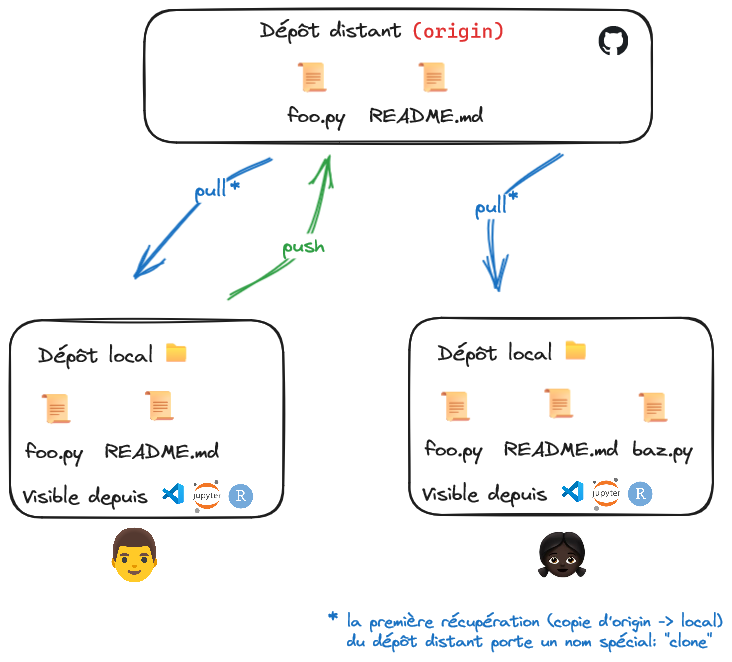
<figcaption>Figure 2.1: Le principe décentralisé de <code>Git</code></figcaption>
</figure>

Nous reviendrons plus précisément sur #fig-local-remote par la suite et notamment les nombreux termes techniques indiqués dessus. Mais la compréhension de cette distinction fondamentale entre dépôt distant et dépôt local était importante pour pouvoir démarrer. On appelle **forge** une plateforme qui stocke des dépôts distants. Dans ce cours, nous allons présenter `Github` mais il en existe d’autres, notamment `Gitlab`.
<span class="column-margin margin-aside">👉️ **Forge**: système de gestion collaborative de textes ou de codes. `Github` et `Gitlab` sont les deux forges les plus connues mais il en existe de nombreuses autres.</span>

Nous avons créé notre dépôt distant à l’exercice principal. Comme créer une version de travail ? Cette opération s’appelle faire un clône (`git clone`). L’objectif du prochain exercice est de faire cette opération, ce qui nécessite néanmoins la compréhension du concept d’authentification avant de pouvoir commencer celui-ci.
<span class="column-margin margin-aside">👉️ `clone`: récupération d’un dépôt distant et de son historique en créant une copie locale</span>

Bien qu’il soit possible d’avoir une utilisation hors-ligne de `Git`,
c’est-à-dire un pur contrôle de version local sans dépôt
distant, cela est une utilisation
rare et qui comporte un intérêt limité. L’intérêt de `Git` est
d’offrir une manière robuste et efficace d’interagir avec un
dépôt distant facilitant ainsi la collaboration en équipe ou en
solitaire.

> **Pourquoi `Github` ?**
>
> Pour ces exercices, il est proposé
> d’utiliser `Github`, la forge la plus visible\[^1\].
> L’avantage de `Github` par rapport à son principal concurrent, `Gitlab`,
> est que le premier est plus visible, car
> mieux indexé par `Google` et concentre, en partie pour des raisons historiques, plus
> de développeurs `Python` et `R` (ce qui est important dans des domaines comme
> le code où les externalités de réseau jouent).
>
> Etre familiarisé à
> l’environnement `Gitlab` reste utile car beaucoup de forges logicielles
> internes reposent sur les fonctionalités *open-source* (l’interface graphique
> en faisant parti) de `Gitlab`. Il est donc fort utile de maîtriser
> les fonctionalités coeur de ces deux interfaces qui sont en fait quasi-identiques. Cela tombe bien, c’est l’objet de ce chapitre et du suivant.

### 2.1.1 S’authentifier à `Github` avec un jeton: principe

<span class="column-margin margin-aside">👉️ **Authentification**: processus permettant à un système informatique de s’assurer de l’identité désirant effectuer une action.</span>

`Git` est un système décentralisé de contrôle de version :
les codes sont modifiés par chaque personne sur son poste de travail,
puis sont mis en conformité avec la version collective disponible
sur le dépôt distant au moment où le contributeur le décide.

Il est donc nécessaire que la forge connaisse l’identité de chacun des
contributeurs, afin de déterminer qui est l’auteur d’une modification apportée
aux codes stockés dans le dépôt distant.
Pour que `Github` reconnaisse un utilisateur proposant des modifications,
il est nécessaire de s’authentifier (un dépôt distant, même public, ne peut pas être modifié par n’importe qui). L’authentification consiste ainsi à fournir un élément que seul vous et la forge êtes censés connaître : un mot de passe, une clé compliquée, un jeton d’accès…

Plus précisément, il existe deux modalités pour faire connaître son identité à `Github` :

-   une **authentification HTTPS** (décrite ici) : l’authentification se fait avec un login et un mot de passe ou avec un *token* (un mot de passe compliqué généré automatiquement par `Github` et connu exclusivement du détenteur du compte `Github`) ;
-   une **authentification SSH** : l’authentification se fait par une clé cryptée disponible sur le poste de travail et que `GitHub` ou `GitLab` connaît. Une fois configurée, cette méthode ne nécessite plus de faire connaître son identité : l’empreinte digitale que constitue la clé suffit à reconnaître un utilisateur. Ce n’est pas la méthode que nous appliquerons ici[3].

<div class="alert alert-info" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-comment"></i> Note sur la double authentification</h3>

<span class="column-margin margin-aside">👉️ **Double authentification** ou **authentification à deux facteurs** (2FA): pratique de sécurité consistant à autoriser une authentification seulement après avoir présenté deux preuves d’identité distinctes à un mécanisme d’authentification. Par exemple, sur une application bancaire, fournir un numéro client et un code envoyé par SMS</span>

Depuis Août 2021, `Github` n’autorise plus l’authentification par mot de passe
lorsqu’on interagit (`pull`/`push`) avec un dépôt distant
([raisons ici](https://github.blog/changelog/2021-08-12-git-password-authentication-is-shutting-down/)).
Il est nécessaire d’utiliser un *token* (jeton d’accès) qui présente l’avantage
d’être révoquable (on peut à tout moment supprimer un jeton si, par exemple,
on suspecte qu’il a été diffusé par erreur) et à droits limités
(le jeton permet certaines opérations standards mais
n’autorise pas certaines opérations déterminantes comme la suppression
d’un dépôt).

GitHub commencera progressivement à exiger que tous les utilisateurs de GitHub activent une ou plusieurs formes d’authentification à deux facteurs (2FA). Pour plus d’informations sur le déploiement de l’inscription 2FA, consultez [cet article de blog](https://github.blog/2023-03-09-raising-the-bar-for-software-security-github-2fa-begins-march-13/). Concrètement, cela signifie que vous devrez au choix :

-   Renseigner votre numéro de portable pour valider certaines connexions grâce à un code que vous recevrez par sms ;
-   Installer une application d’authentification (Ex : Microsoft Authenticator) installée sur votre téléphone qui génèrera un QR code que vous pourrez scanner depuis github, ce qui ne nécessite pas que vous ayez à fournir votre numéro de téléphone
-   Utiliser une clef USB de sécurité

Pour choisir entre ces différentes options, vous pouvez vous rendre sur *Settings \> Password and authentication \> Enable two-factor authentication*.

</div>

### 2.1.2 Créer un jeton

<span class="column-margin margin-aside">👉️ **L’authentification par jeton** (*token authentication*) est une forme d’authentification qui permet à un utilisateur d’accéder à un service en ligne, une application, ou un site web sans qu’il n’ait à ressaisir ses identifiants. Les jetons d’authentification fonctionnent à la manière d’un ticket d’entrée à validité limitée : ils accordent un accès en continu pendant leur durée de validité. Dès que l’utilisateur se déconnecte ou quitte l’application, le jeton est invalidé.</span>

La [documentation officielle](https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/creating-a-personal-access-token) comporte un certain nombre de captures d’écran expliquant
comment procéder. En gardant cette documentation ouverte en cas de doute, et les instructions du prochain exercice, nous allons pouvoir créer un jeton d’authentification.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 2 : Créer un token</h3>

Suivre la
[documentation officielle](https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/creating-a-personal-access-token) en ne donnant que les droits `repo` au jeton[4].

Pour résumer les étapes devraient être les suivantes :

*Settings (account) \> Developers Settings \> Personal Access Token \> Tokens (classic) \> Generate a new token (classic) \> “MyToken” \> Expiration “90 days” \> cocher juste “repo” \> Generate token \> Le copier*

**⚠️ Gardez la page ouverte**, le *token* n’apparaît qu’une fois et nous n’avons pas encore fait l’effort de le stocker à un endroit pérenne. Cela sera l’objet du prochain exercice. Néanmoins pas d’inquiétude si vous avez perdu le *token* avant de pouvoir le sauvegarder, vous pouvez en regénérer un nouveau en suivant à nouveau la procédure ci-dessus.

</div>

Nous avons créé un *token* et comme cela est indiqué sur la page de `Github` ou dans les consignes de l’exercice, celui-ci n’est pas pérenne. Il va donc falloir trouver un moyen de conserver celui-ci quelque part. Nous allons proposer plusieurs solutions pour cela. Ecrire celui-ci dans un fichier texte créé avec le bloc note ne fait pas parti de ces solutions, au contraire c’est une très mauvaise pratique.

<div class="alert alert-danger" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-triangle-exclamation"></i> Important</h3>

Il est important de ne jamais stocker un *token*, et encore moins son mot de passe, dans un projet.
Il est possible de stocker un mot de passe ou *token* de manière sécurisée et durable
avec le *credential helper* de `Git`. Celui-ci est présenté par la suite.

S’il n’est pas possible d’utiliser le *credential helper* de `Git`, un mot de passe
ou *token* peut être stocké de manière sécurisé dans
un système de gestion de mot de passe comme [Keepass](https://keepass.fr/).

Ne jamais stocker un jeton `Github`, ou pire un mot de passe, dans un fichier
texte non crypté. Les logiciels de gestion de mot de passe
(comme [Keepass](https://keepass.fr/), recommandé par l’Anssi)
sont simples
d’usage et permettent de ne conserver sur l’ordinateur qu’une version
hashée du mot de passe qui ne peut être décryptée qu’avec un mot de passe
connu de vous seuls.

</div>

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 3: stocker son jeton (pour les utilisateurs du SSPCloud)</h3>

Le `SSPCloud` propose un service de stockage d’un jeton qui peut ensuite servir facilement pour s’authentifier sur `Github` quand on utilise `VSCode` ou `Jupyter`.

-   Copier le jeton qui est affiché sur la page de `Github` qui a été ouverte précédemment. Ne faites pas la sélection des lettres à la main, utilisez le bouton dédié au copier-coller ()
-   Cliquer sur la section [“Mon Compte”](https://datalab.sspcloud.fr/account/) du `SSPCloud`. Aller dans l’onglet `Git` et coller la valeur précédemment copiée.

On peut s’arrêter à ce stade, nous utiliserons ce jeton lors du prochain exercice.

</div>

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 3bis: stocker son jeton (pour les personnes n’ayant pas l’accès au SSPCloud)</h3>

La solution recommandée est de stocker son jeton dans un un gestionnaire de mot de passe comme
[Keepass](https://keepass.fr/) (recommandé par l’Anssi). Il s’agit d’un logiciel qui stocke, de manière chiffrée, les mots de passe qui y sont conservés selon la logique du coffre fort numérique.

Au-delà de l’intérêt pour stocker un jeton Github pour ce cours, ces logiciels sont très pratiques au quotidien et sécurisent l’accès à des services numériques sensibles. Ils comportent aussi des générateurs de mot de passe forts qui permettent de réduire les risques d’usurpation numérique en rendant quasi-impossible des techniques comme [l’attaque par force brute](https://fr.wikipedia.org/wiki/Attaque_par_force_brute).

</div>

Maintenant que nous avons stocké notre jeton dans un endroit sécurisé, nous pouvons passer à l’étape suivante qui consiste à récupérer notre dépôt distant dans une copie de travail, opération qui nous amènera à réellement utiliser le jeton que nous avons mis de côté pour le moment.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 4a: créer un service et comprendre le principe du clône et de l’authentification (utilisateurs du SSPCloud)</h3>

1.  Sur le SSPCloud, se rendre dans la page [Mes Services](https://datalab.sspcloud.fr/my-services).

2.  Cliquer sur `➕​ Nouveau service` et choisir un service `vscode-python` (ne pas en prendre un autre).

3.  Laisser les paramètres par défaut et lancer le service.

4.  Une fois le service prêt, cliquer sur le bouton “Cliquez pour copier le mot de passe du service”. Cela va stocker le mot de passe du service (généré aléatoirement, celui-ci n’a rien à voir avec votre mot de passe général du `SSPCloud`) dans le presse papier. Ce mot de passe est également visible en clair dans la partie qui est caviardée sur la <a href="#fig-readme-sspcloud" class="quarto-xref">Figure 2.2</a>.

<figure id="fig-readme-sspcloud">
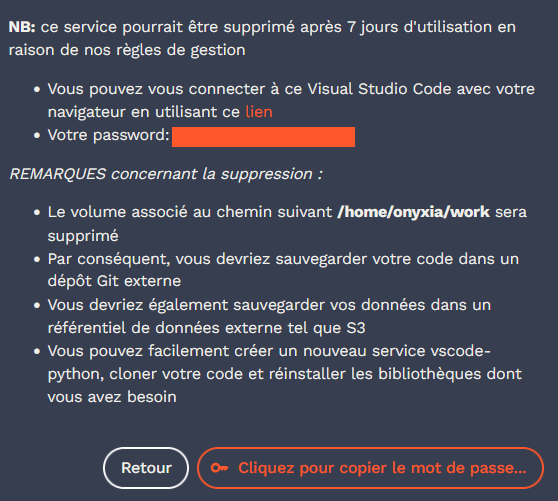
<figcaption>Figure 2.2</figcaption>
</figure>

1.  Coller ce mot de passe dans le champ `Password` qui s’affiche quand vous ouvrez le service.

2.  Dans un autre onglet, récupérer, sur la page d’accueil de votre dépôt, l’url du dépôt distant qui est accessible en cliquant à droite sur le bouton vert `<> Code`. L’URL prend la forme suivante

`https://github.com/<username>/<reponame>.git`

1.  Ouvrir le terminal (`☰ > Terminal > New Terminal`) et commencer à taper

``` python
git clone # coller votre url de la forme https://github.com/<username>/<reponame>.git 
```

pour coller à la suite votre URL, si <kbd>CTRL</kbd>+<kbd>V</kbd> est bloqué par le navigateur, vous pouvez faire <kbd>MAJ</kbd>+<kbd>Inser</kbd>. Taper <kbd>Entrée</kbd>.

1.  Une page va s’ouvrir *“The extension ‘GitHub’ wants to sign in using GitHub”*. Refuser en cliquant sur *“Cancel”* (les questions optionnelles montrent ce qu’il se passe quand vous acceptez, vous basculez sur un autre mode d’authentification).

2.  Dans la fenêtre en haut, taper votre username d’abord. Puis lorsqu’il vous demande votre mot de passe, **coller votre *token*, pas votre mot de passe `Github`** (si vous avez toujours la page `Github` ouverte, le copier de là, sinon en retournant sur la page [Mon compte](https://datalab.sspcloud.fr/account/git) du `SSPCloud`)

3.  Observer la mise à jour de l’explorateur de fichiers sur `VSCode`, votre `README` et votre `.gitignore` visibles sur `Github` doivent maintenant être là.

4.  Taper `cd mon-petit-projet` en supposant que le dossier de votre dépôt s’appelle `mon-petit-projet`. Puis taper `git remote -v`, une commande qui demande à `Git` de voir où pointe `origin`, votre dépôt distant. La réponse devrait être l’URL que vous avez renseigné précedemment

Ceci était une illustration nécessaire pour comprendre le principe de l’authentification. Le prochain exercice (4b) proposera une manière plus directe de fonctionner, qu’il est utile de connaître car elle vous évitera d’avoir à vous authentifier à chaque interaction avec le dépôt distant.

En option, pour comprendre la différence avec l’authentification déléguée proposée par VSCode, vous pouvez faire, de manière optionnelle, les consignes suivantes:

1.  Toujours dans le même VSCode, ouvrir un nouveau terminal (`☰ > Terminal > New Terminal`)

2.  Taper `git clone https://github.com/<username>/<reponame>.git repo-bis` en remplaçant `https://github.com/<username>/<reponame>.git` par l’URL de votre dépôt. Cela clônera votre dépôt dans le dossier `repo-bis` quand vous serez effectivement authentifié.

3.  Cette fois accepter l’authentification déléguée proposée par VSCode. Il s’agit d’une authentification à deux facteurs:

    -   Le premier facteur d’authentification est le code que `Github` vous demande de copier et de renseigner dans la page que `VSCode` désire ouvrir (il faut que vous acceptiez de copier et d’ouvrir la page). Coller ce code à 8 caractères, valider et accepter les droits demandés par l’application.
    -   Le deuxième facteur est le code de votre application d’authentification (par exemple `Google Authenticator` ou celui que vous recevez par SMS). Mettre celui-ci et valider, le clône devrait démarrer

</div>

Cet exercice vient de nous illustrer le principe de l’authentification et la manière dont `VSCode` peut attester de votre identité grâce à un *token* ou à une double authentification. L’exercice suivant propose une méthode d’authentification par token un peu plus pratique que celle que nous avions mise en oeuvre ☝️.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 4b: créer un service et comprendre le principe du clône et de l’authentification (utilisateurs du SSPCloud)</h3>

Cette approche montre comment le SSPCloud injecte lors de la création d’un service VSCode le *token* et le dépôt que vous désirez clôner.

1.  Sur le SSPCloud, se rendre dans la page [Mes Services](https://datalab.sspcloud.fr/my-services). Vous pouvez supprimer le service existant, il n’est plus nécessaire.

2.  Cliquer sur `➕​ Nouveau service` et choisir un service `vscode-python` (ne pas en prendre un autre).

-   Dans un autre onglet, récupérer, sur la page d’accueil de votre dépôt, l’url du dépôt distant qui est accessible en cliquant à droite sur le bouton vert `<> Code`. L’URL prend la forme suivante

`https://github.com/<username>/<reponame>.git`

-   Dérouler le menu `Configuration Vscode-python` et chercher l’onglet `Git`

-   Dans celui-ci, vous devriez voir votre *token* pré-injecté dans le formulaire. Ne le changez pas.

-   Dans un autre onglet, récupérer, sur la page d’accueil de votre dépôt, l’url du dépôt distant qui est accessible en cliquant à droite sur le bouton vert `<> Code`. L’URL prend la forme suivante

`https://github.com/<username>/<reponame>.git`

Vous pouvez utiliser l’icone à droite pour copier l’url.

-   Coller celle-ci dans le champ `Repository` du formulaire de création du service sur le `SSPCloud`. Lancer le service et attendre qu’il se crée (une vingtaine de secondes).

-   Le clône du dépôt distant devrait être visible dans l’aborescence des fichiers.

-   Ouvrir le terminal (`☰ > Terminal > New Terminal`) et taper `git remote -v`, une commande qui demande à `Git` de voir où pointe `origin`, votre dépôt distant. La réponse prend la forme:

``` python
https://ghp_XXXX@github.com/username/repository.git
```

qui se distingue de l’URL que vous aviez renseigné dans l’onglet `Git`.
Comme vous pouvez le voir avec cette méthode, le jeton est en clair. C’est pour cette raison qu’on utilise, plutôt que des mots de passe, des jetons
puisque, si ces derniers sont révélés, on peut toujours les révoquer et éviter
les problèmes

</div>

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 4 alternatif: quand on ne dispose pas de compte sur le SSPCloud</h3>

Le mode opératoire est très proche. En pratique, la seule différence est qu’il n’y a pas besoin de créer de nouveau service puisqu’une installation de `VSCode` existe déjà.

1.  Sur votre navigateur, récupérer, sur la page d’accueil de votre dépôt, l’url du dépôt distant qui est accessible en cliquant à droite sur le bouton vert `<> Code`. L’URL prend la forme suivante

`https://github.com/<username>/<reponame>.git`

1.  Ouvrir le terminal (`Terminal > New Terminal`) et commencer à taper

<!-- -->

    git clone

et coller la valeur copiée précédemment. Ne validez pas. Avec les touches directionnelles, se placer entre `https://` et `github.com`. Récupérer dans votre navigateur ou `Keepass` votre jeton `Github`. Coller celui-ci puis ajouter `@`. Cela devrait donner

``` python
https://ghp_XXXX@github.com/username/repository.git
```

Ce qui, dans l’ensemble, fera

``` python
git clone https://ghp_XXXX@github.com/username/repository.git
```

-   Le clône du dépôt distant devrait être visible dans l’aborescence des fichiers.

Comme vous pouvez le voir avec cette méthode, le jeton est en clair. C’est pour cette raison qu’on utilise, plutôt que des mots de passe, des jetons
puisque, si ces derniers sont révélés, on peut toujours les révoquer et éviter
les problèmes

</div>

## 2.2 La *staging area*

<span class="column-margin margin-aside">👉️ ***Staging area***: zone d’attente de `Git` avant validation de nouvelles modifications dans l’histoire d’un fichier.</span>

Dans un monde sans `Git`, on écrit du code, on sauvegarde son script et parfois on considère que cette version vaut le coup d’être considérée comme une version de laquelle repartir. Avec `Git` c’est la même chose, seulement se principe sera formalisé plus proprement.

Le premier niveau conceptuel est celui de l’index des modifications. Il s’agit des modifications en attente de validation, d’où le nom de *staging area* dans la première partie de <a href="#fig-staging-area" class="quarto-xref">Figure 2.3</a>.

<figure id="fig-staging-area">
<img src="https://inseefrlab.github.io/formation-bonnes-pratiques-git-R/slides/img/completeworkflow.png" />
<figcaption>Figure 2.3: La gymnastique de <code>Git</code> dans son ensemble</figcaption>
</figure>

En principe, quand on édite des scripts ou *notebooks*, on enregistre régulièrement ceux-ci. Le niveau d’implication suivant est de mettre de côté une version particulière de ceux-ci, ce qu’à la main (voir la <a href="#fig-version-control-inferno" class="quarto-xref">Figure 1</a>), nous ferions en dupliquant le fichier. Cela implique de mettre une ou plusieurs modifications dans la liste d’attente des modifications à valider. Cette opération s’appelle `git add` et est l’objet du prochain exercice.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 5 : Indexer des modifications</h3>

1.  Créer un dossier 📁 `scripts` dans le dossier de votre dépôt. Sur `VSCode`, vous pouvez utiliser les icônes adaptées.

2.  Y créer les fichiers `script1.py` et `script2.py`, chacun contenant quelques commandes `Python` de votre choix (le contenu de ces fichiers n’est pas important).

3.  Se rendre dans l’extension `Git` de `VSCode`. Vous devriez
    retrouver un cadre ayant cet aspect

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: center;"><div width="50.0%" data-layout-align="center">
<p><img src="https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/git_vscode_1.png" /></p>
</div></td>
<td style="text-align: center;"><div width="50.0%" data-layout-align="center">
<p><img src="https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/git-status-ensae.png" /></p>
</div></td>
</tr>
</tbody>
</table>

Figure 2.4: Interface graphique Git sous VSCode (à gauche) et Jupyter (à droite)

En ligne de commande, c’est l’équivalent de

``` shell
git status
```

1.  Sur `VSCode`, un bouton `+` figure à droite du nom
    du fichier `.script1.py` et
    `.script2.py`. Sur `Jupyter`, en passant votre souris au dessus du nom des fichiers `script1.py` et
    `script2.py`, vous devriez voir
    un `+` apparaître. Cliquez dessus.

Si vous aviez privilégié la ligne de commande, ce que vous avez fait est équivalent à :

``` shell
git add scripts/script1.py
git add scripts/script2.py
```

1.  Observer le changement de statut du fichier après avoir cliqué sur `+`. Il est
    désormais dans la partie `Staged`.

En gros, vous venez de dire à `Git` que vous allez rendre publique une évolution
du fichier, mais vous ne l’avez pas encore fait (`Staged` est une liste d’attente).

Si vous étiez en ligne de commande vous auriez ce résultat après un `git status`

``` raw
On branch main

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
        new file:   .gitignore
```

Les nouvelles modifications (en
l’occurrence la création du fichier et la validation de son contenu actuel)
ne sont pas encore archivées. Pour cela, il va falloir faire un
`commit` (on s’engage en rendant publique une modification).

1.  Modifier le contenu d’une ligne déjà existante dans le `README.md` et faire la même gymnastique d’ajout à l’index.

2.  Regardons les modifications qu’on va prochainement
    valider. Pour cela, passez la souris au dessus du nom du fichier
    `README.md` et cliquer dessus.
    Une page s’ouvre et met en regard la version antérieure avec
    les ajouts en vert et les suppressions en rouge. Nous retrouverons
    cette visualisation avec l’interface `Github`, plus tard.

Si vous faites la même chose pour `scripts/script1.py`, comme le fichier n’existait pas, normalement nous n’avons que
des ajouts.

Il est également possible d’effectuer cela avec la ligne de commande mais c’est
beaucoup moins pratique. Pour cela, la commande à appeler est `git diff` et
il est nécessaire d’utiliser l’option `cached` pour lui dire d’inspecter les
fichiers pour lesquels on n’a pas encore effectué de `commit`. En vert
apparaîtront les modifications et en rouge les suppressions mais, cette fois,
les résultats ne seront pas mis côte-à-côte ce qui est beaucoup moins
pratique.

``` shell
git diff --cached
```

</div>

## 2.3 Le *commit*

A ce stade, nous avons configuré `Git` pour être en mesure
de s’authentifier automatiquement et nous avons cloné le dépôt pour avoir une
copie locale de travail. Nous avons fait des modifications, les avons mis dans la file d’attente de notre système de gestion de version. Il ne reste plus qu’à finaliser le travail.

Pour rappel, la <a href="#fig-staging-area" class="quarto-xref">Figure 2.3</a> illustrait la gymnastique pour faire évoluer l’histoire de son projet. Après l’ajout dans la file d’attente (la *staging area*), on valide les modifications avec un *commit*. Comme son nom l’indique, il
s’agit d’une proposition de modification sur laquelle, en quelques
sortes, on s’engage.
<span class="column-margin margin-aside">👉️ ***Commit***: Enregistrement de l’évolution d’un fichier. Il s’agit de l’unité de temps fondamentale en `Git`.</span>

Un *commit* comporte un titre et éventuellement une description. A ces
informations, `Git` ajoutera automatiquement quelques éléments
supplémentaires, notamment l’auteur du commit (pour identifier la personne
ayant proposé cette modification) et l’horodatage (pour identifier le moment
où cette modification a été proposée). Ces informations permettront d’identifier
de manière unique le `commit` auquel sera ajouté un identifiant aléatoire
unique (un numéro SHA) qui permettra de faire référence à celui-ci sans
ambiguïté.

Le titre est important car il s’agit, pour un humain, du point d’entrée
dans l’histoire d’un dépôt (voir par exemple
[l’histoire du dépôt du cours](https://github.com/linogaliana/python-datascientist/commits/main).
Les titres vagues
(*Mise à jour du fichier*, *Update*…) sont à bannir car ils
nécessiteront un effort inutile pour comprendre les fichiers modifiés.

N’oubliez pas que votre premier collaborateur est votre *moi futur* qui,
dans quelques semaines, ne se souviendra pas en quoi consistait
le commit *Update* du 12 janvier et en quoi il se distingue du
*Update* du 13 mars.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 5: premier commit (enfin !)</h3>

Sur `VSCode`, il faut au contraire regarder en haut.

![](https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/git_vscode_2.png)

<details>

<summary>

Sur l’interface de `Jupyter`

</summary>

Sur `Jupyter`, à l’inverse, tout se passe dans la partie inférieure de l’interface graphique.

![](https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/git-panel-jupyter.png)

</details>

1️⃣ Entrer le titre `Création des premiers scripts 🎉` et ajouter une description
`Fichiers dans le dossier script`.
Sur `VSCode`, le titre du commit correspond à la
première ligne du message de commit, les lignes suivantes, après un saut de ligne, correspondent à la
description.

2️⃣ Cliquer sur `Commit`. Le fichier a disparu de la liste, c’est normal,
il n’a plus de modification à valider. Pour le retrouver dans la liste
des fichiers `Changed`, il faudra le modifier à nouveau

3️⃣ Vous devriez voir la ligne de vie de votre projet s’allonger. Vous pouvez cliquer sur le commit pour retrouver les changements que vous avez validé

</div>

[1] Pour savoir si vous êtes éligibles au SSPCloud, vous pouvez cliquer sur [ce lien](https://auth.lab.sspcloud.fr/auth/realms/sspcloud/login-actions/authenticate?client_id=onyxia) et consulter la liste des domaines autorisés.

[2] Plus précisément, `Git` est un système décentralisé et asynchrone de contrôle de version. Cela signifie qu’outre le fait qu’on édite ses fichiers sur des copies locales, on n’a pas besoin d’être connecté en continu au dépôt distant. On peut faire les modifications et les soumettre plus tard.

[3] La [documentation collaborative `utilitR`](https://www.book.utilitr.org/03_fiches_thematiques/fiche_configurer_git.html#interaction-avec-un-d%C3%A9p%C3%B4t-distant-principe) présente les raisons pour lesquelles il convient de favoriser
la méthode HTTPS sur la méthode SSH.

[4] Comme vous pouvez le voir, il y a de nombreux niveaux de droits différents. Votre mot de passe a en fait tout ces droits, ce qui illustre bien le pouvoir dangereux de celui-ci s’il est découvert, que ce soit du fait d’une révélation par erreur ou d’un *hacking* de celui-ci par quelqu’un malveillant. L’utilisation de *token* sécurise énormément votre dépôt puisqu’il ne peut pas être supprimé si le *token* a des droits limités. De plus, si la branche principale est protégée, ce qui est le comportement par défaut de `Github`, il ne sera pas possible sans mot de passe de détruire l’historique du dépôt.

In [ ]:
containerQuestionGit1

<div class="alert alert-info" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-comment"></i> Note</h3>

Si vous utilisiez la ligne de commande, la manière équivalente de faire
serait

``` shell
git commit -m "Initial commit" -m "Création des premiers fichiers 🎉"
```

L’option `m` permet de créer un message, qui sera disponible à l’ensemble
des contributeurs du projet. Avec la ligne de commande, ce n’est pas toujours
très pratique. Les interfaces graphiques permettent des messages plus
développés (la bonne pratique veut qu’on écrive un message de commit comme un
mail succinct : un titre et un peu d’explications, si besoin).

</div>

## 2.4 Le fichier `.gitignore`

Lorsqu’on utilise `Git`, il y a des fichiers qu’on ne veut pas partager
ou dont on ne veut pas suivre les modifications (typiquement les grosses bases de données).

C’est le fichier `.gitignore`
qui gère les fichiers exclus du contrôle de version.
Lors de la création du projet sur `GitHub`, nous avons demandé la création d’un fichier `.gitignore`, qui se situe à la racine du projet. Il spécifie l’ensemble des fichiers qui seront toujours exclus de l’indexation faite par `Git`.
<span class="column-margin margin-aside">👉️ `.gitignore`: fichier stockant un ensemble de règles de fichiers ne devant pas être suivis par `Git`.</span>

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 6: le fichier .gitignore</h3>

1️⃣ Ouvrir le fichier `.gitignore` et observer
quelques règles écrites dedans

<details>

<summary>

Afficher ce fichier quand on utilise `Jupyter`

</summary>

Par défaut, le fichier `.gitignore` n’est pas affiché car
les fichiers `.*` sont des fichiers de configuration. Il faut activer
une option pour l’afficher. Tout en haut
de `Jupyter`, cliquer sur `View -> Show Hidden Files`

</details>

2️⃣ Créer un dossier `data` à la racine du projet et créer à l’intérieur de celui-ci un fichier `data/raw.csv` avec une ligne de données quelconque. Regardez l’onglet `Git` et remarquez la présence du fichier dans les changements à valider. **Ne pas ajouter à la *staging area* et committer ce fichier**.

3️⃣ Ajouter la ligne `data/` dans le `.gitignore` (c’est un fichier texte modifiable), n’oubliez pas de sauvegarder. Retourner sur l’onglet `Git` et observer le changement. Comprenez-vous ce qu’il se passe ?

4️⃣ Créer un fichier `raw2.csv` à la racine et un fichier `data/read_data.py` avec une ligne de code `Python` (le contenu du fichier n’est pas important).

5️⃣ Retourner sur l’onglet `Git` et observer le changement de votre dépôt.

</div>

In [ ]:
textQuestion2 = md`__❓ **Question** : quelle règle faudrait-il mettre dans notre \`.gitignore\`__`

In [ ]:
textQuestion3

In [ ]:
textQuestion3 = md`__❓ **Question** : que se passe-t-il lorsque l'on ajoute au \`.gitignore\` des fichiers qui ont déjà été *commit* sur le projet Git ?__`

Il ne faut pas négliger le `.gitignore`.

`Git` est un système de contrôle de version qui est pensé pour des fichiers textes, pas des fichiers de données. Contrairement aux fichiers texte où `Git` peut contrôler ligne à ligne les évolutions, ce qui en fait un gestionnaire de version utile, les fichiers de données sont trop complexes pour ce suivi fin, ce qui fait que chaque modification de ces fichiers, souvent lourds (plusieurs Méga Octets), revient à dupliquer le fichier dans la mémoire de `Git` (plus de détails sur les alternatives dans <a href="#tip-data" class="quarto-xref">Tip 2.1</a>).

Outre cette raison technique qui explique qu’on veuille exclure les fichiers de données du contrôle de version, il ne faut pas oublier que les données exploitées par les *data scientists* sont souvent confidentielles, collectées pour des finalités bien définies ou ayant un intérêt stratégique qu’une divulgation à des concurrents pourait fragiliser. Partager des données au monde entier peut coûter très cher en vertu du RGPD dont les amendes peuvent aller jusqu’à 4% du chiffre d’affaires mondial.

Ce fichier `.gitignore` fait ainsi office de garde-fou. Il est utile d’être conservateur avec celui-ci quitte à autoriser, au cas par cas et de manière consciente, des dérogations. Pour cette raison, il est recommandé d’ajouter de nombreuses extensions classiques de données à celui-ci: `*.xlsx`, `*.csv`, `*.parquet`…

> **Tip 2.1: Si les données ne vont pas sur `Github`, où les stocker ?**
>
> Il est plus pertinent de stocker des données dans des environnements *ad hoc*. Pour cela, l’état de l’art dans les technologies *cloud* est d’utiliser un système de stockage spécialisé qui suit un protocole nommé `S3`. Ce dernier a été développé à l’origine par Amazon pour son *cloud* commercial AWS avant d’être rendu *open source*. Cela permet ainsi d’avoir des infrastructures *cloud* qui utilisent cette technologie indépendamment d’Amazon.
>
> `Github` apparaît certes pratique pour stocker des données. Mais il n’y a pas de *free lunch*. Ceci a d’abord un coût environnemental : `Git`, et donc *a fortiori* `Github`, n’étant pas des systèmes de stockage de bases de données, ils n’optimisent pas le stockage de celles-ci. Il serait bon de ne pas faire croître plus que nécessaire, par du gaspillage numérique, l’empreinte carbone du numérique, déjà en croissance (Arcep 2019). Ensuite, ce choix, à l’origine pratique, s’avère souvent coûteux à long terme. Si la donnée archivée avec `Git` évolue fréquemment, la duplication inévitable qu’implique celle-ci fera exploser la volumétrie du dépôt. A partir d’un certain seuil, il faudra basculer vers des solutions complexes comme `Git large file storage (LFS)` ce qui est clairement évitable avec de la discipline. Au contraire, avec des systèmes de stockage pensés pour de la donnée, comme le protocole `S3`, le stockage et le traitement de celle-ci sont optimisés. C’est ce qui distingue les systèmes de stockage de données comme `S3` d’autres systèmes de stockages pensés pour des fichiers, indépendamment de leur format, comme `Drive` qui n’est pas adapté aux besoins des *data scientists*.
>
> Stocker de la donnée est coûteux pour les fournisseurs de *cloud* et il n’est pas étonnant que ces derniers proposent rarement des offres gratuites de volumes importants. Les utilisateurs.trices du `SSPCloud` bénéficient d’un système de stockage associé à la plateforme et suivant le protocole S3. Plus d’éléments dans le [chapitre consacré](../../modern-ds/s3.qmd) et dans le cours de 3e année de l’ENSAE de [Mise en production de projets *data science*](https://ensae-reproductibilite.github.io/website/).

# 3. Premières interactions avec `Github` depuis sa copie de travail

Jusqu’à présent, après avoir cloné le dépôt, on a travaillé uniquement
sur notre copie locale. On n’a pas cherché à interagir à nouveau
avec `Github`.

Il est tout à fait possible de faire du contrôle de version sans
mettre en place de dépôt distant. Cependant,

-   c’est dangereux puisque le dépôt distant fait office de sauvegarde
    d’un projet. Sans dépôt distant, on peut tout perdre en cas de problème
    sur la copie locale de travail ;
-   c’est désirer être moins efficace car, comme nous allons le montrer, les
    fonctionalités des plateformes `Github` et `Gitlab` sont également très
    bénéfiques lorsqu’on travaille tout seul.

Interagir avec le dépôt distant consiste à récupérer les nouveautés sur celui-ci ou envoyer nos dernières modifications vers ce dépôt centralisateur. En pratique, on peut donc résumer 95% de la pratique quotidienne de `Git` en trois mots:

-   `commit` : je valide les modifications que j’ai faites en local avec un message qui les explique
-   `pull` : je récupère la dernière version des codes du dépôt distant (opération dite `fetch`) et je la fusionne avec mes changements, si j’en ai fait (opération dite `merge`)
-   `push` : je transmets mes modifications validées au dépôt distant

Nous avons déjà vu le premier, nous allons voir maintenant les deux nouveaux termes.
Avant cela, on peut revenir sur une commande déjà évoquée `git remote -v`. Le dépôt distant s’appelle `remote` en langage Git. L’option `-v` (*verbose*)
permet de lister le(s) dépôt(s) distant(s).

En ouvrant un terminal dans `VSCode`, en tapant `git remote -v` dans celui-ci, vous devriez avoir un résultat similaire à celui-ci:

``` shell
origin  https://<PAT>@github.com/<username>/<projectname>.git (fetch)
origin  https://<PAT>@github.com/<username>/<projectname>.git (push)
```

Plusieurs informations sont intéressantes dans ce résultat. D’abord on
retrouve bien l’url qu’on avait renseigné à `Git` lors de l’opération
de clonage. Ensuite, on remarque un terme `origin`. C’est un alias
pour l’url qui suit. Cela évite d’avoir, à chaque fois, à taper l’ensemble
de l’url, ce qui peut être pénible et source d’erreur.

`fetch` et `push`
sont là pour nous indiquer qu’on récupère (`fetch`) des modifications
d’`origin` mais qu’on envoie également (`push`) des modifications vers
celui-ci. Généralement, les url de ces deux dépôts sont les mêmes mais cela peut
arriver, lorsqu’on contribue à des projets opensource qu’on n’a pas créé,
qu’ils diffèrent. Ceci sera expliqué dans le prochain chapitre lorsque nous aborderons le sujet de la collaboration.

## 3.1 Envoyer des modifications sur le dépôt distant (`push`)

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 7 : Interagir avec Github</h3>

Il convient maintenant d’envoyer les fichiers sur le dépôt distant.

1️⃣ Si vous ne l’avez pas déjà fait, ajouter la règle `*.csv` dans votre `.gitignore`. Avec l’interface graphique, ajouter tous les fichiers en attente dans l’index (`git add`) et faites un *commit* (`git commit`).  
2️⃣ Cliquer sur le bouton <i class="fa-solid fa-arrows-rotate"></i> Sync changes <i class="fa-solid fa-arrow-up"></i>

L’équivalent de ces deux questions serait, en ligne de commande:

``` python
git add -u
git commit -m "Le titre du commit"
git push origin main
```

Ligne 3  
Cela signifie: *“git envoie (`push`) mes modifications sur la
branche `main` (la branche sur laquelle on a travaillé, on reviendra
dessus) vers mon dépôt (alias
`origin`)”*

</div>

## 3.2 Récupérer des modifications depuis le dépôt distant (`pull`)

La deuxième manière d’interagir avec le dépôt est de récupérer des
résultats disponibles en ligne sur sa copie de travail. On appelle
cela `pull`.

Pour le moment, vous êtes tout seul sur le dépôt. Il n’y a donc pas de
partenaire pour modifier un fichier dans le dépôt distant. On va simuler ce
cas en utilisant l’interface graphique de `Github` pour modifier
des fichiers. On rapatriera les résultats en local dans un deuxième temps.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 8: Rapatrier des modifications en local</h3>

1️⃣ Se rendre sur votre dépôt depuis l’interface <https://github.com>

-   Se placer sur le fichier `README.md` et cliquer sur le bouton `Edit this file`, qui prend la forme d’un icône de crayon.

2️⃣ Changer le titre du `README.md`. Sautez une ligne à la fin de votre fichier et entrez le texte que vous désirez, sans ponctuation. Par exemple,

``` markdown
le chêne un jour dit au roseau
```

3️⃣ Cliquez sur l’onglet `Preview` pour voir le texte mis en forme au format `Markdown`

4️⃣ Rédiger un titre et un message complémentaire pour faire le `commit`. Conserver
l’option par défaut `Commit directly to the main branch`

5️⃣ Editer à nouveau le `README` en cliquant sur le crayon juste au dessus
de l’affichage du contenu du `README`.

Ajouter une deuxième phrase et corrigez la
ponctuation de la première. Ecrire un message de commit et valider.

``` markdown
Le Chêne un jour dit au roseau :
Vous avez bien sujet d'accuser la Nature
```

6️⃣ Au dessus de l’aborescence des fichiers, vous devriez voir s’afficher le
titre du dernier commit. Vous pouvez cliquer dessus pour voir la modification
que vous avez faite.

7️⃣ Les résultats sont sur le dépôt distant mais ne sont pas sur votre
dossier de travail dans `Jupyter` ou `VSCode`. Il faut re-synchroniser votre copie locale
avec le dépôt distant :

-   Sur `VSCode`, cliquez simplement sur `... > Pull` à côté du bouton qui permet
    de visualiser le graphe Git.
-   Avec l’interface `Jupyter`, si cela est possible, appuyez tout simplement sur la petite
    flèche vers le bas, qui est celle qui a désormais la pastille orange.
-   Si cette flèche n’est pas disponible ou si vous travaillez dans un autre
    environnement, vous pouvez utiliser la ligne de
    commande et taper

``` python
git pull origin main
```

Ligne 1  
Cela signifie : *“git récupère (`pull`) les modifications sur la
branche `main` vers mon dépôt (alias
`origin`)”*

8️⃣ Regarder à nouveau l’historique des commits. Cliquez sur le
dernier commit et affichez les changements sur le fichier. Vous pouvez
remarquer la finesse du contrôle de version : `Git` détecte au sein de
la première ligne de votre texte que vous avez mis des majuscules
ou de la ponctuation.

</div>

L’opération `pull` permet :

1.  A votre système local de vérifier les modifications sur le dépôt distant
    que vous n’auriez pas faites (cette opération s’appelle `fetch`)
2.  De les fusionner s’il n’y a pas de conflit de version ou si les conflits de
    version sont automatiquement fusionnables (deux modifications d’un fichier mais
    qui ne portent pas sur le même emplacement).

# 4. Les branches

Jusqu’à présent, nous avons fait évoluer de manière linéaire notre historique, sans prendre de risque. Ceci est déjà très sécurisant puisqu’on peut toujours retrouver l’état passé d’un code. Mais comment faire quand on désire faire des évolutions conséquentes, impliquant plusieurs étapes intermédiaires ayant vocation à être chacune un *commit*, sans risque de déstabiliser notre version dont on était, jusqu’à présent, satisfait.

`Git` propose un système extrêmement pratique pour cela: les branches. Une branche est une version parallèle du projet qui coexiste avec la version principale, sur `main`. Cela veut dire qu’avec `Git`, on peut avoir un même fichier qui coexiste sous plusieurs versions différentes ce qui constitue un terreau fertile pour l’expérimentation. Une version sera active (la branche active) mais les autres seront disponibles, activables si besoin.

On peut voir l’historique de `Git` comme un arbre raffiné. La branche `main` est le tronc. Les autres branches partent de ce tronc et divergent. Le tronc peut très bien évoluer en parallèle de ces branches. L’arbre de `Git` est néanmoins spécial, quelques peu noueux : les branches peuvent revenir et fusionner avec le tronc. Nous verrons cela de manière plus illustrée dans le prochain exercice et dans le prochain chapitre puisque c’est l’une des bases du travail collaboratif avec `Git`.

Voici quelques exemples où les branches sont utilisées pour des travaux significatifs :

-   vous travaillez seul sur une tâche qui va vous prendre plusieurs heures ou jours de travail (vous ne devez pas pousser sur `main` des travaux non aboutis);
-   vous travaillez sur une fonctionnalité nouvelle et vous souhaiterez recueillir l’avis de vos collaborateurs avant de modifier `main`;
-   vous n’êtes pas certain de réussir vos modifications du premier coup et préférez faire des tests en parallèle.

Il est commun, dans un cadre collaboratif, d’utiliser à foison les branches. Comme nous le verrons dans le prochain chapitre, cela peut en effet faire économiser un temps précieux si l’organisation du projet est mal définie. Néanmoins, les branches ne sont pas un remède magique car leur gestion demande de la rigueur et peut entraîner de la désorganisation sans celle-ci. `Git` est une solution technique qui fluidifie l’organisation mais en cas de rôles mal définis, il va rapidement vous révéler les problèmes, mais ne vous offrira pas la solution sans un effort de réflexion sur l’organisation du travail.

<div class="alert alert-" role="alert">
<h3 class="alert-heading"> Caution</h3>

Les branches ne sont pas personnelles, ce n’est pas parce que vous avez créé une branche qu’une des personnes collaborant avec vous sur le projet `Git` ne pourra pas modifier cette branche.

L’utilisation des branches est une fonctionnalité déjà avancée de `Git`. Ce dernier est un outil technique formidable mais ne résout pas les problèmes organisationnels. Au contraire, avec `Git`, ils se révèleront beaucoup plus vite. `Git` est vraiment le socle minimal des bonnes pratiques, un outil qui va inciter à toujours mieux travailler.

Parmi les pratiques techniquement possibles mais non recommandables, il faut **absolument** bannir les usages de `push force` qui peuvent déstabiliser les copies locales des collaborateurs. S’il est nécessaire de faire un `push force`, c’est qu’il y a un problème dans la branche, à identifier et régler **sans** faire `push force`.

![](https://miro.medium.com/max/400/0*XaLzNzYkA6PZjbl9.jpg)

</div>

Les branches sont généralement associées au système des [*issues*](https://docs.github.com/fr/issues/tracking-your-work-with-issues/about-issues) sur `Github`. Les *issues* ne sont pas des fonctionnalités natives de `Git` mais apportées par `Github` qui vise à simplifier le suivi d’un projet et les retours des autres collaborateurs.trices ou utilisateurs.trices d’un projet.

On peut voir les *issues* comme un système de discussion où peuvent échanger les personnes intéressées par le projet. L’intérêt d’utiliser ceci par le biais de `Github` plutôt qu’une boucle de mail et que cela permet de centraliser au même endroit que le code les échanges et la documentation utiles à son évolution. La finalité des *issues* est très large: cela peut être pour discuter de nouvelles fonctionnalités qui finalement ne seront pas mises en oeuvre, signaler des bugs, se répartir le travail, etc. Une utilisation intensive des *issues*, avec des labels adéquats, peut même amener à se passer d’outils de gestion de projets comme `Trello`.

Le prochain exercice vise à illustrer le principe des branches en inventant un exemple de demande passant par une *issue* et proposant une nouvelle fonctionnalité dans le projet.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 9: Créer une nouvelle branche et l’intégrer dans main</h3>

1️⃣ Ouvrir une *issue* sur `Github` (cf. explications ci-dessus sur le principe des *issues*). Signaler qu’il serait bien d’ajouter un emoji chat dans le `README`. Dans la partie de droite, cliquer sur la petite roue à côté de `Label` et cliquer sur `Edit Labels`. Créer un label `Markdown`. Normalement, le label a été ajouté.

2️⃣ Retournez sur votre dépôt local. Vous allez créer une branche nommée
`issue-1`

<details>

<summary>

Comment faire dans `VSCode` ?

</summary>

Sur VSCode, cliquez sur `... > Branch > Create Branch` et entrez le nom `issue-1`.

</details>

<details>

<summary>

Comment faire dans `Jupyter` ?

</summary>

Avec l’interface graphique de `JupyterLab`, cliquez sur `Current Branch - Main`
puis sur le bouton `New Branch`. Rentrez `issue-1` comme nom de branche
(la branche doit être créée depuis `main`, ce qui est normalement le choix
par défaut) et cliquez sur `Create Branch`.

</details>

<details>

<summary>

Comment faire en ligne de commande ?

</summary>

Si vous n’utilisez pas l’interface graphique mais la ligne de commande, la
manière équivalente de faire est

``` python
git checkout -b issue-1
```

Ligne 1  
La commande `checkout` est un couteau-suisse de la gestion de branche en `Git`. Elle permet en effet de basculer d’une branche à l’autre, mais aussi d’en créer, etc.

</details>

3️⃣ Ouvrez `README.md` et ajoutez un emoji chat (🐱) à la suite du titre.
Faites un commit en refaisant les étapes vues dans les exercices
précédents. N’oubliez pas, cela se fait en deux étapes:

1.  Ajoute les modifications à l’index en déplacant le fichier `README` dans
    la partie `Staged`
2.  Validation des modifications avec un `commit`

Si vous passez par la ligne de commande, cela donnera :

``` shell
git add .
git commit -m "ajout emoji chat"
```

4️⃣ Faire un **deuxième commit** pour ajouter un emoji koala (:koala:) puis
pousser les modifications locales:
+ Sur `VSCode`, cliquez sur le bouton `Publish Branch`.
+ Sinon, si vous utilisez la ligne de commande, vous devrez taper `git push origin issue-1`

5️⃣ Dans `Github`, devrait apparaître

> `issue-1 had recent pushes XX minutes ago`.

Cliquer sur `Compare & Pull Request`. Donner un titre informatif à votre *pull request*
Dans le message en dessous, taper

> `- close #1`

Le tiret est une petite astuce pour que `Github`
remplace le numéro de l’issue par le titre.

Cliquez sur `Create Pull Request` mais
**ne validez pas la fusion**, on le fera dans un second temps.

Le fait d’avoir mis un message `close` suivi d’un numéro d’issue `#1`
permettra de fermer automatiquement l’*issue 1* lorsque vous ferez le *merge*.
En attendant, vous avez créé un lien entre l’*issue* et la *pull request*

Au passage, vous pouvez ajouter le label `Markdown` sur la droite.

6️⃣ En local, retourner sur `main`. Dans l’interface `Jupyter`, il suffit
de cliquer sur `main` dans la liste des branches. Sur `VSCode`, la liste des branches
apparaît en cliquant sur le nom de la branche actuelle (`issue-1` en théorie à ce stade).
Si vous êtes en ligne de commande, il faut faire

``` shell
git checkout main
```

`checkout` est une commande `Git` qui permet de naviguer d’une branche à l’autre
(voire d’un commit à l’autre).

Ajouter une phrase à la suite de votre texte dans le `README.md`
(ne touchez pas au titre !). Vous pouvez remarquer que les emojis
ne sont pas dans le titre, c’est normal vous n’avez pas encore fusionné les versions

7️⃣ Faire un commit et un push. En ligne de commande, cela donne

``` shell
git add .
git commit -m "ajoute un troisième vers"
git push origin main
```

8️⃣ Sur `Github`, cliquer sur `Insights` en haut du dépôt puis, à gauche sur `Network` (cela n’est
possible que si vous avez rendu public votre dépôt).

Vous devriez voir apparaître l’arborescence de votre dépôt. On peut voir `issue-1` comme une ramification et `main` comme le tronc.

L’objectif est maintenant de ramener les modifications faites dans `issue-1` dans la branche principale. Retournez dans l’onglet `Pull Requests`. Là, changer le type de `merge` pour `Squash and Merge`, comme ci-dessous (petit conseil : choisissez toujours cette méthode de *merge*).

Une fois que cela est fait, vous pouvez retourner dans `Insights` puis `Network` pour vérifier que tout s’est bien passé comme prévu.

![](https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/squashmerge.png)

9️⃣ Supprimer la branche (*branch \> delete this branch*). Puisqu’elle est mergée, elle ne servira plus. La conserver risque d’amener à des `push` involontaires dessus.

</div>

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-lightbulb"></i> Tip</h3>

L’option de fusion *Squash and Merge* permet de regrouper tous les commits d’une branche (potentiellement très nombreux) en un seul dans la branche de destination. Cela évite, sur les gros projets, des branches avec des milliers de *commits*.

Je recommande de toujours utiliser cette technique et non les autres.
Pour désactiver les autres techniques, vous pouvez aller dans
`Settings` et dans la partie `Merge button` ne conserver cochée que la
méthode `Allow squash merging`

</div>

Nous avons toutes les bases nécessaires pour passer à l’étape suivante dans notre périple `Git`: le travail collaboratif. Néanmoins, `Git` ne doit pas être utilisé que dans des projets collectifs. Même tout seul, les gains de qualité à l’utilisation de `Git` sont sans équivalents.

Arcep. 2019. « L’empreinte carbone du numérique ». *Rapport de l’Arcep*.